In [1]:
import warnings
import pandas as pd
import numpy as np
import astropy.units as u
from matplotlib import pyplot, colors
from astropy.coordinates import SkyCoord
from gammapy.stats import WStatCountsStatistic
from utils import merge_hdf_files, calc_angular_separation, crab_magic

In [2]:
pyplot.rcParams['figure.figsize'] = (12, 9)
pyplot.rcParams['font.size'] = 15
pyplot.rcParams['grid.linestyle'] = ':'

color_cycle = pyplot.rcParams['axes.prop_cycle'].by_key()['color']
warnings.simplefilter('ignore')

In [3]:
# MAGIC-stereo sensitivity (Aleksic 2016, Table A.8, Li&Ma 3 OFF)
sensies_magic = np.array([5.7, 3.0, 2.11, 1.90, 1.58, 1.81, 2.00, 3.9, 4.6, 10]) / 100
sensies_magic_err = np.array([0.3, 0.3, 0.11, 0.14, 0.09, 0.13, 0.19, 0.6, 0.9, 3]) / 100

# Load DL2 data

In [4]:
# === setting ===
data_mask = '../2020_*/4.dl1_to_dl2/data/dl2/merged/*.h5'

# === main ===
data_stereo = merge_hdf_files(data_mask, n_files=5)
data_stereo.sort_index(inplace=True)

n_events_total = len(data_stereo.groupby(['obs_id', 'event_id']).size()) 
print(f'\nIn total {n_events_total} stereo events are found.') 

print('\nEvents with 2 tels info:')

tel_ids_dict = {
    'LST-1 + MAGIC-I': [1, 2],
    'LST-1 + MAGIC-II': [1, 3],
    'MAGIC-I + MAGIC-II': [2, 3]
}

for tel_name, tel_ids, in zip(tel_ids_dict.keys(), tel_ids_dict.values()):
    
    df = data_stereo.query(f'(tel_id == {list(tel_ids)}) & (multiplicity == 2)')
    n_events = np.sum(df.groupby(['obs_id', 'event_id']).size().values == 2)
    print(f'{tel_name}: {n_events} events ({n_events/n_events_total*100:.1f}%)')
    
print('\nEvents with 3 tels info:')

n_events = len(data_stereo.query(f'multiplicity == 3').groupby(['obs_id', 'event_id']).size())
print(f'LST-1 + MAGIC-I + MAGIC-II: {n_events:.0f} events ({n_events/n_events_total*100:.1f}%)')


Merging the input data to subsets...
../2020_11_18/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run02923.h5
../2020_11_18/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run02924.h5
../2020_12_13/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run03234.h5
../2020_12_13/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run03235.h5
../2020_12_15/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run03265.h5
--> ../2020_11_18/4.dl1_to_dl2/data/dl2/merged/subset_dl2_lst1_magic_Run02923_to_dl2_lst1_magic_Run03265.h5

../2020_12_15/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run03266.h5
../2020_12_15/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run03267.h5
../2020_12_15/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run03268.h5
../2020_12_22/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run03382.h5
../2020_12_22/4.dl1_to_dl2/data/dl2/merged/dl2_lst1_magic_Run03383.h5
--> ../2020_11_18/4.dl1_to_dl2/data/dl2/merged/subset_dl2_lst1_magic_Run03266_to_dl2_lst1_magic_Run03383.h5

Merging the subset data:
../2020_11_18/4.dl1

In [5]:
data_stereo.head()

obs_id_lst  event_id_lst   intensity         x  \
obs_id  event_id tel_id                                                   
5093174 2122     1           2923.0     2054288.0  307.962953 -0.315250   
                 2           2923.0     2054288.0  108.671875  0.027797   
        2126     1           2923.0     2054414.0  174.241061  0.010928   
                 2           2923.0     2054414.0  176.444987  0.319373   
        2130     1           2923.0     2054693.0  646.928410 -0.682803   

                                y         r         phi    length     width  \
obs_id  event_id tel_id                                                       
5093174 2122     1       0.533384  0.619582  120.584658  0.153488  0.051308   
                 2       0.335385  0.336535   85.262067  0.085343  0.017875   
        2126     1      -0.131373  0.131827  -85.244971  0.101673  0.049368   
                 2       0.086378  0.330847   15.134165  0.092057  0.019301   
        2130     1       0.063893  0.685786  174.654160  0.138337  0.056016   

                               psi  ...     ra_tel    dec_tel    ra_reco  \
obs_id  event_id tel_id             ...                                    
5093174 2122     1      -31.610509  ...  83.963124  22.247049  83.346973   
                 2      -25.261473  ...  83.967988  22.245614  82.422005   
        2126     1       10.226202  ...  83.963123  22.247052  82.932625   
                 2       53.087812  ...  83.967990  22.245614  82.050592   
        2130     1       39.110881  ...  83.963122  22.247059  84.332838   

                          dec_reco  ra_reco_mean  dec_reco_mean  \
obs_id  event_id tel_id                                           
5093174 2122     1       22.009114     84.866105      20.106463   
                 2       22.145910     84.866105      20.106463   
        2126     1       22.660566     83.160144      22.706243   
                 2       21.856361     83.160144      22.706243   
        2130     1       21.326110     84.446739      21.245125   

                         event_class_0  event_class_1  event_class_0_mean  \
obs_id  event_id tel_id                                                     
5093174 2122     1            0.135700       0.864300            0.131926   
                 2            0.128152       0.871848            0.131926   
        2126     1            0.012250       0.987750            0.013304   
                 2            0.014359       0.985641            0.013304   
        2130     1            0.395065       0.604935            0.672623   

                         event_class_1_mean  
obs_id  event_id tel_id                      
5093174 2122     1                 0.868074  
                 2                 0.868074  
        2126     1                 0.986696  
                 2                 0.986696  
        2130     1                 0.327377  

[5 rows x 53 columns]

# Arrange the data frame

In [6]:
params = ['ra_tel', 'dec_tel', 'ra_reco_mean', 'dec_reco_mean', 
          'energy_reco_mean', 'event_class_0_mean', 'multiplicity', 'timestamp']

df_dl2 = data_stereo.groupby(['obs_id', 'event_id']).mean()[params]
df_dl2.query('multiplicity == 3', inplace=True)

print(f'DL2 data frame: {len(df_dl2)} events')

DL2 data frame: 813157 events


# Check observation time

In [7]:
obs_time = 0

obs_ids_list = np.unique(df_dl2.index.get_level_values('obs_id'))

for obs_id in obs_ids_list:
    
    timestamps = df_dl2.query(f'obs_id == {obs_id}')['timestamp'].values
    obs_time += (timestamps[-1] - timestamps[0]) * u.s
    
print(f'Total observation time: {obs_time.to(u.min):.1f}')
    
time_50h = 50*60*60 * u.s
time_ratio = (time_50h/obs_time).value

print(f'Time ratio over 50h observation: {time_ratio:.1f}')

Total observation time: 133.3 min
Time ratio over 50h observation: 22.5


# Calculate angular separation

In [8]:
# === settings ===
source_name = 'Crab'
n_off_region = 3

# === main ===
on_coord = SkyCoord.from_name(source_name)
on_coord = on_coord.transform_to('icrs')

for obs_id in obs_ids_list:
    
    print(f'obs_id = {obs_id}')
    
    event_coords = SkyCoord(
        ra=df_dl2.query(f'obs_id == {obs_id}')['ra_reco_mean'].values*u.deg, 
        dec=df_dl2.query(f'obs_id == {obs_id}')['dec_reco_mean'].values*u.deg, frame='icrs'
    )
    
    tel_coords = SkyCoord(
        ra=df_dl2.query(f'obs_id == {obs_id}')['ra_tel'].values*u.deg, 
        dec=df_dl2.query(f'obs_id == {obs_id}')['dec_tel'].values*u.deg, frame='icrs'
    )
    
    # --- calculate the angular separation ---
    theta_on, theta_off, off_coords = calc_angular_separation(
        on_coord, event_coords, tel_coords, n_off_region
    )
    
    df_dl2.loc[(obs_id, slice(None)), 'theta2_on'] = theta_on.to(u.deg).value**2
    
    for i_off in theta_off.keys():
        df_dl2.loc[(obs_id, slice(None)), f'theta2_off{i_off}'] = theta_off[i_off].to(u.deg).value**2
        

obs_id = 5093174
mean_offset = 0.387 [deg], mean_rot = 36.8 [deg]
obs_id = 5093175
mean_offset = 0.409 [deg], mean_rot = 213.6 [deg]
obs_id = 5093663
mean_offset = 0.390 [deg], mean_rot = 215.1 [deg]
obs_id = 5093664
mean_offset = 0.409 [deg], mean_rot = 35.1 [deg]
obs_id = 5093711
mean_offset = 0.386 [deg], mean_rot = 37.1 [deg]
obs_id = 5093712
mean_offset = 0.411 [deg], mean_rot = 213.5 [deg]
obs_id = 5093713
mean_offset = 0.388 [deg], mean_rot = 36.7 [deg]
obs_id = 5093714
mean_offset = 0.408 [deg], mean_rot = 213.6 [deg]
obs_id = 5094024
mean_offset = 0.405 [deg], mean_rot = 35.1 [deg]
obs_id = 5094025
mean_offset = 0.391 [deg], mean_rot = 215.2 [deg]


# Check sensitivity from data

### Function to find cuts to minimize the sensitivity:

In [9]:
def get_best_cuts_sensi(data, bins_eng, bins_gam_cut, bins_t2_cut, t2_cut_off):
    
    print('Checking the cuts to minimize the sensitivity...')

    n_bins_gam_cut = len(bins_gam_cut)
    n_bins_t2_cut = len(bins_t2_cut)

    bins_gam_cut = np.repeat(bins_gam_cut, n_bins_t2_cut)
    bins_t2_cut = np.tile(bins_t2_cut, n_bins_gam_cut)
    
    gam_cuts_best = np.array([])
    t2_cuts_best = np.array([])
    
    for eng_lo, eng_hi in zip(bins_eng[:-1], bins_eng[1:]):
        
        df = data.query(f'(energy_reco_mean > {eng_lo}) & (energy_reco_mean < {eng_hi})')
        
        sensies_list = np.array([])
        
        for gam_cut, t2_cut in zip(bins_gam_cut, bins_t2_cut):

            condition_on = f'(event_class_0_mean > {gam_cut}) & (theta2_on < {t2_cut})'
            n_on_obs = len(df.query(condition_on))
            
            condition_off = '(event_class_0_mean > {}) & (theta2_off{} < {})'

            if t2_cut_off != None:
                
                alpha = t2_cut/(n_off_region*t2_cut_off)
                
                n_off_obs = np.sum([len(df.query(condition_off.format(gam_cut, i_off+1, t2_cut_off)))
                                    for i_off in range(n_off_region)])
            
            else:
                alpha = 1/n_off_region
                
                n_off_obs = np.sum([len(df.query(condition_off.format(gam_cut, i_off+1, t2_cut)))
                                    for i_off in range(n_off_region)])

            n_exs_obs = n_on_obs - alpha*n_off_obs 

            n_on_50h = n_on_obs*time_ratio
            n_off_50h = n_off_obs*time_ratio
            n_exs_50h = n_exs_obs*time_ratio

            stat = WStatCountsStatistic(n_on_50h, n_off_50h, alpha=alpha)
            n_exs_5sig = stat.n_sig_matching_significance(5)

            sensi = n_exs_5sig/n_exs_50h
            sensies_list = np.append(sensies_list, sensi)

        condition = (sensies_list == np.min(sensies_list))

        gam_cut_at_min = bins_gam_cut[condition][0]
        t2_cut_at_min = bins_t2_cut[condition][0]

        gam_cuts_best = np.append(gam_cuts_best, gam_cut_at_min)
        t2_cuts_best = np.append(t2_cuts_best, t2_cut_at_min)

    return gam_cuts_best, t2_cuts_best

### Calculate the sensitivity:

Checking the cuts to minimize the sensitivity...

0.100 < E < 0.158 [TeV]
Parameter cuts: (gam, t2) = (0.8, 0.02), t2_off = 0.05
N_on_obs = 179, N_off_obs = 496 (alpha = 0.133), N_exs_obs = 113
LiMa sig = 8.293% Crab, Sys limit = 2.930% Crab, Stat limit = 0.394% Crab
--> Sensitivity = (8.293 +/- 2.605)% Crab



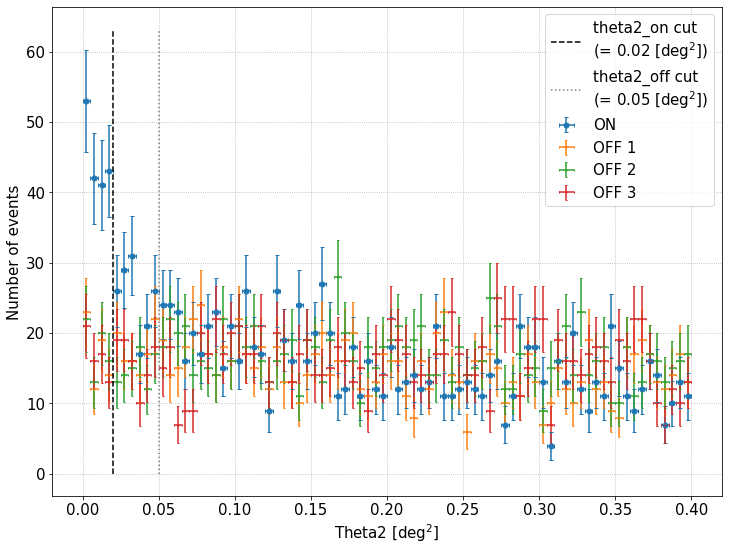


0.158 < E < 0.251 [TeV]
Parameter cuts: (gam, t2) = (0.8, 0.02), t2_off = 0.05
N_on_obs = 512, N_off_obs = 822 (alpha = 0.133), N_exs_obs = 402
LiMa sig = 2.978% Crab, Sys limit = 1.362% Crab, Stat limit = 0.110% Crab
--> Sensitivity = (2.978 +/- 0.937)% Crab



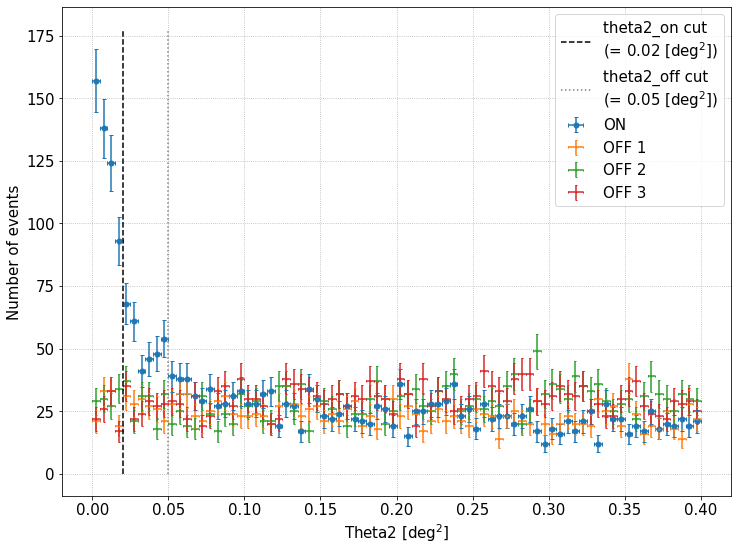


0.251 < E < 0.398 [TeV]
Parameter cuts: (gam, t2) = (0.9, 0.015), t2_off = 0.05
N_on_obs = 215, N_off_obs = 119 (alpha = 0.100), N_exs_obs = 203
LiMa sig = 1.986% Crab, Sys limit = 0.293% Crab, Stat limit = 0.219% Crab
--> Sensitivity = (1.986 +/- 0.546)% Crab



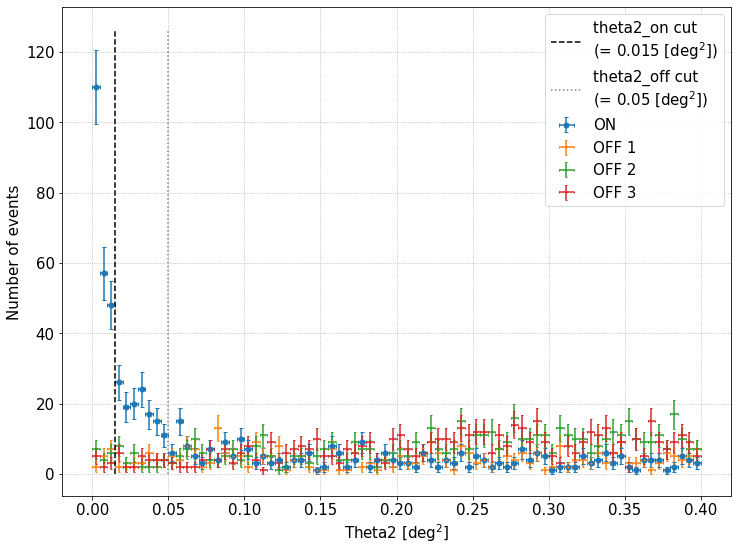


0.398 < E < 0.631 [TeV]
Parameter cuts: (gam, t2) = (0.9, 0.015), t2_off = 0.05
N_on_obs = 155, N_off_obs = 60 (alpha = 0.100), N_exs_obs = 149
LiMa sig = 1.964% Crab, Sys limit = 0.201% Crab, Stat limit = 0.298% Crab
--> Sensitivity = (1.964 +/- 0.535)% Crab



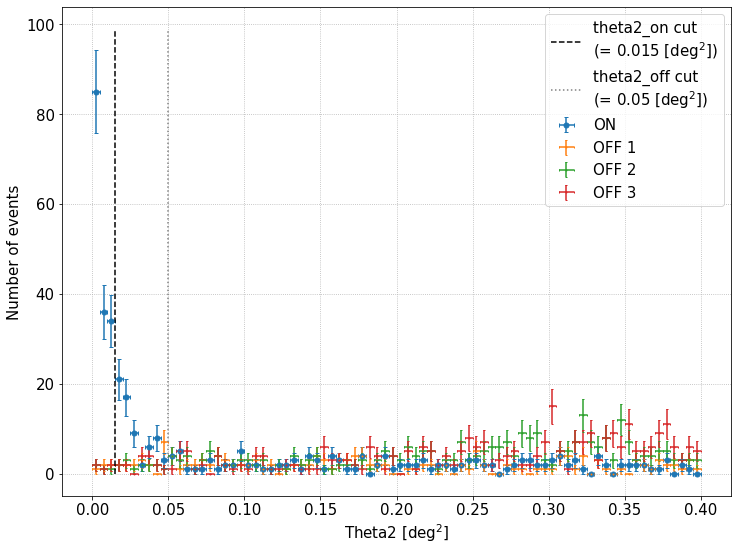


0.631 < E < 1.000 [TeV]
Parameter cuts: (gam, t2) = (0.85, 0.01), t2_off = 0.05
N_on_obs = 133, N_off_obs = 44 (alpha = 0.067), N_exs_obs = 130
LiMa sig = 1.590% Crab, Sys limit = 0.113% Crab, Stat limit = 0.342% Crab
--> Sensitivity = (1.590 +/- 0.363)% Crab



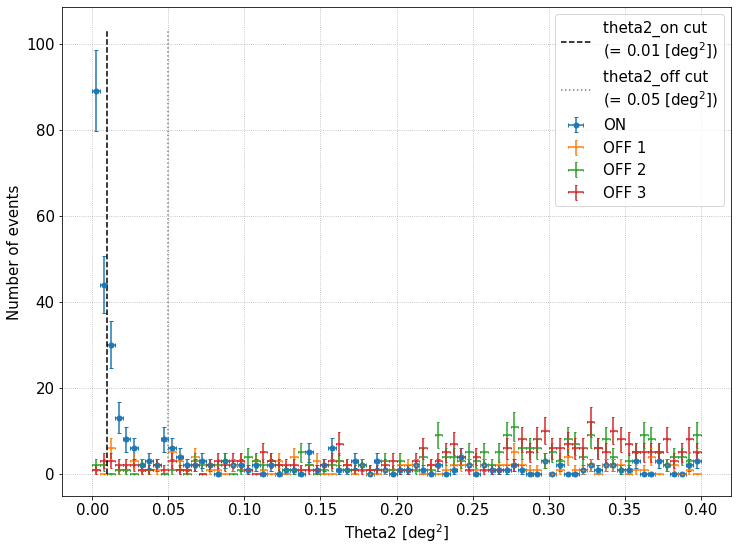


1.000 < E < 1.585 [TeV]
Parameter cuts: (gam, t2) = (0.9, 0.01), t2_off = 0.05
N_on_obs = 67, N_off_obs = 14 (alpha = 0.067), N_exs_obs = 66
LiMa sig = 1.894% Crab, Sys limit = 0.071% Crab, Stat limit = 0.673% Crab
--> Sensitivity = (1.894 +/- 0.438)% Crab



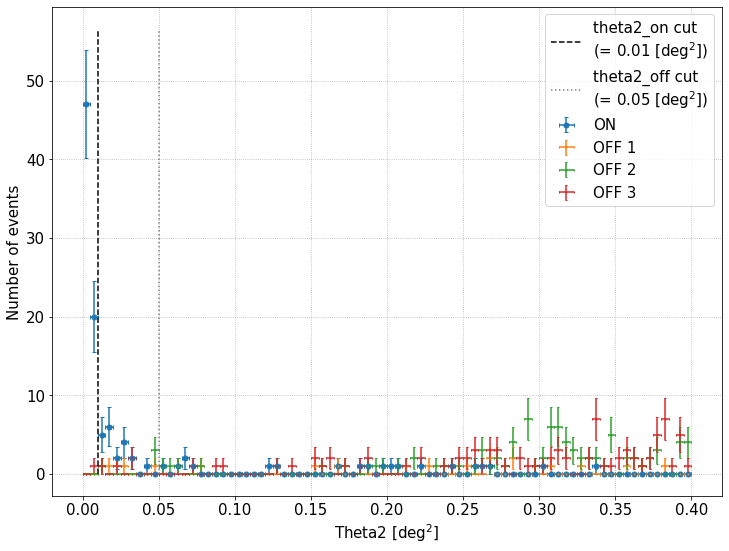


1.585 < E < 2.512 [TeV]
Parameter cuts: (gam, t2) = (0.85, 0.01), t2_off = 0.05
N_on_obs = 39, N_off_obs = 4 (alpha = 0.067), N_exs_obs = 39
LiMa sig = 1.952% Crab, Sys limit = 0.034% Crab, Stat limit = 1.148% Crab
--> Sensitivity = (1.952 +/- 0.462)% Crab



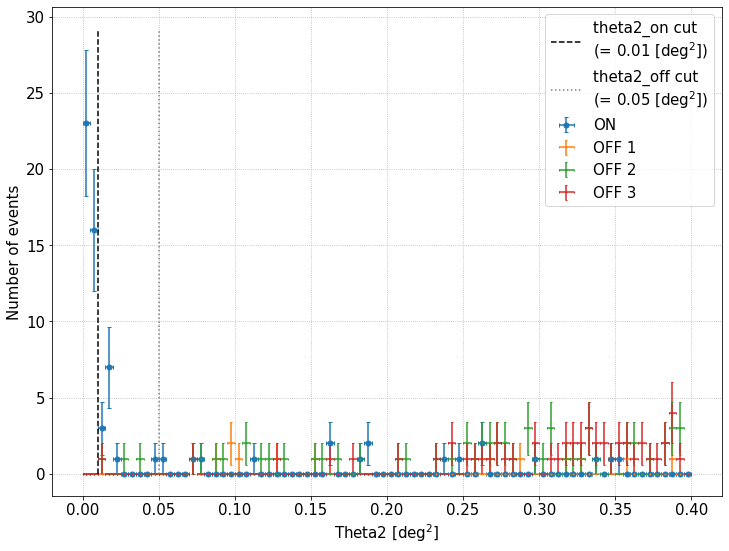


2.512 < E < 3.981 [TeV]
Parameter cuts: (gam, t2) = (0.8, 0.01), t2_off = 0.05
N_on_obs = 19, N_off_obs = 2 (alpha = 0.067), N_exs_obs = 19
LiMa sig = 3.118% Crab, Sys limit = 0.035% Crab, Stat limit = 2.356% Crab
--> Sensitivity = (3.118 +/- 0.868)% Crab



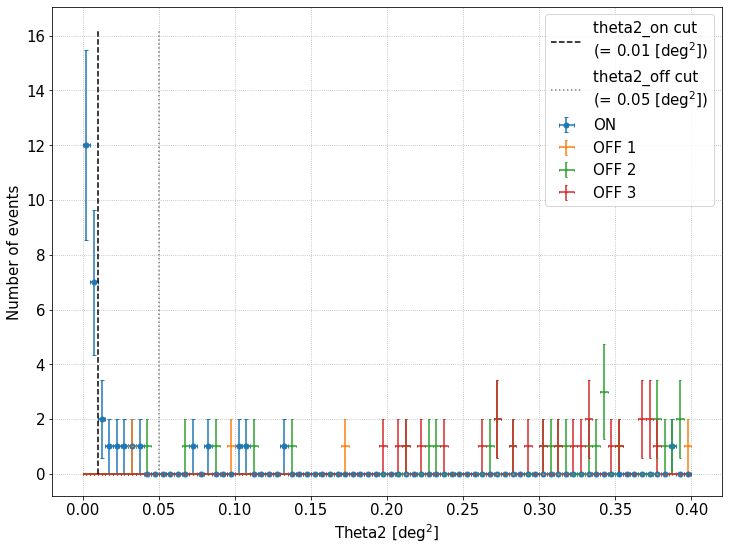


3.981 < E < 6.310 [TeV]
Parameter cuts: (gam, t2) = (0.7, 0.01), t2_off = 0.05
N_on_obs = 11, N_off_obs = 0 (alpha = 0.067), N_exs_obs = 11
LiMa sig = 1.822% Crab, Sys limit = 0.000% Crab, Stat limit = 4.041% Crab
--> Sensitivity = (4.041 +/- 1.218)% Crab



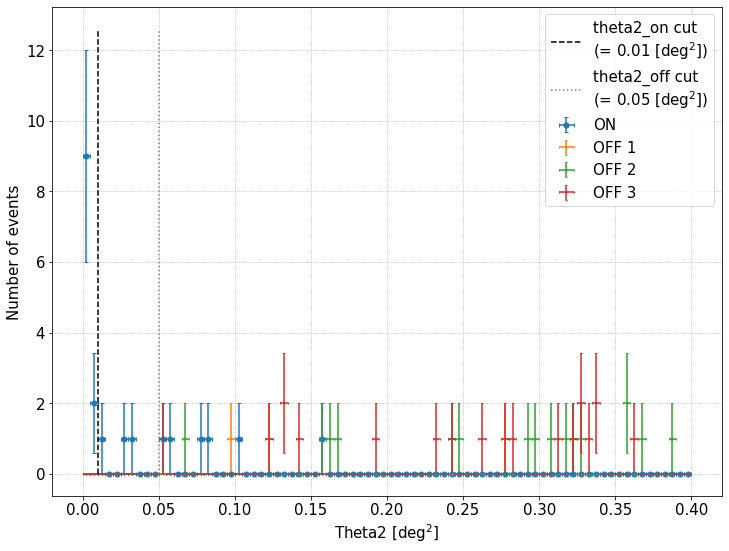


6.310 < E < 10.000 [TeV]
Parameter cuts: (gam, t2) = (0.7, 0.035), t2_off = 0.05
N_on_obs = 6, N_off_obs = 0 (alpha = 0.233), N_exs_obs = 6
LiMa sig = 5.562% Crab, Sys limit = 0.000% Crab, Stat limit = 7.408% Crab
--> Sensitivity = (7.408 +/- 3.024)% Crab



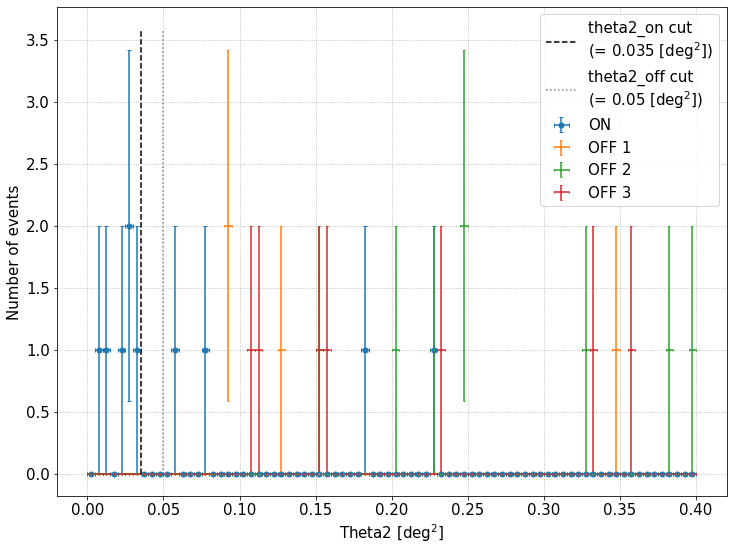

In [10]:
# === settings ===
bins_eng = np.logspace(-1, 1, 11)
bins_t2 = np.linspace(0, 0.4, 81)
t2_cut_off = 0.05

gam_cuts_list, t2_cuts_list = get_best_cuts_sensi(
    data=df_dl2, bins_eng=bins_eng,
    bins_gam_cut=np.round(np.arange(0.5, 0.91, 0.05), 2),
    bins_t2_cut=np.round(np.arange(0.01, 0.051, 0.005), 3),
    t2_cut_off=t2_cut_off
)

# gam_cuts_list = np.repeat(0.8, 11)
# t2_cuts_list = np.repreat(0.03, 11)

# === main ===
sensies_best = np.array([])
sensies_best_err = np.array([])

for i_bin, (eng_lo, eng_hi) in enumerate(zip(bins_eng[:-1], bins_eng[1:])):

    print(f'\n{eng_lo:.3f} < E < {eng_hi:.3f} [TeV]')
    
    gam_cut = gam_cuts_list[i_bin]
    t2_cut = t2_cuts_list[i_bin]
    
    condition = f'(energy_reco_mean > {eng_lo}) & (energy_reco_mean < {eng_hi}) & (event_class_0_mean > {gam_cut})'
    df = df_dl2.query(condition)
    
    n_on_obs = len(df.query(f'(theta2_on < {t2_cut})'))
    
    condition_off = '(theta2_off{} < {})'
    
    if t2_cut_off != None:
        
        alpha = t2_cut/(n_off_region*t2_cut_off)
        n_off_obs = np.sum([len(df.query(condition_off.format(i_off+1, t2_cut_off))) 
                            for i_off in range(n_off_region)])
    
    else:
        alpha = 1/n_off_region
        n_off_obs = np.sum([len(df.query(condition_off.format(i_off+1, t2_cut))) for i_off in range(n_off_region)])
    
    n_exs_obs = n_on_obs - alpha*n_off_obs
    
    print(f'Parameter cuts: (gam, t2) = ({gam_cut}, {t2_cut}), t2_off = {t2_cut_off}')
    print(f'N_on_obs = {n_on_obs}, N_off_obs = {n_off_obs} (alpha = {alpha:.3f}), N_exs_obs = {n_exs_obs:.0f}')
    
    # --- check the sensitivity ---
    n_on_50h = n_on_obs*time_ratio
    n_off_50h = n_off_obs*time_ratio
    n_exs_50h = n_exs_obs*time_ratio
    
    stat = WStatCountsStatistic(n_on_50h, n_off_50h, alpha=alpha)
    n_exs_5sig = stat.n_sig_matching_significance(5)

    sensi_lima = n_exs_5sig/n_exs_50h
    sensi_limit_sys = (0.05*alpha*n_off_50h)/n_exs_50h
    sensi_limit_stat = 10/n_exs_50h
    
    print(f'LiMa sig = {sensi_lima*100:.3f}% Crab, ' \
          f'Sys limit = {sensi_limit_sys*100:.3f}% Crab, ' \
          f'Stat limit = {sensi_limit_stat*100:.3f}% Crab')
    
    sensi = np.max([sensi_lima, sensi_limit_sys, sensi_limit_stat])
    
    if sensi == sensi_lima:
        sensi_err = np.sqrt(n_on_50h*n_exs_5sig**2 + (alpha**2)*n_off_50h*(n_exs_5sig - n_exs_50h)**2) \
                    * np.sqrt(time_ratio) / (n_exs_50h**2)
    
    elif sensi == sensi_limit_sys:
        sensi_err = 0.05*alpha*np.sqrt(time_ratio*n_on_50h*n_off_50h*(n_on_50h + n_off_50h))/(n_exs_50h**2)
    
    elif sensi == sensi_limit_stat:
        sensi_err = 10*np.sqrt(time_ratio*(n_on_50h + (alpha**2)*n_off_50h))/(n_exs_50h**2)
    
    print(f'--> Sensitivity = ({sensi*100:.3f} +/- {sensi_err*100:.3f})% Crab\n')
    
    sensies_best = np.append(sensies_best, sensi)
    sensies_best_err = np.append(sensies_best_err, sensi_err)
    
    # --- check theta2 distributions ---
    pyplot.figure()
    pyplot.xlabel('Theta2 [deg$^2$]')
    pyplot.ylabel('Number of events')

    hist_on, _ = np.histogram(df['theta2_on'].values, bins_t2)

    bins_center = (bins_t2[:-1] + bins_t2[1:])/2
    x_err = [bins_center - bins_t2[:-1], bins_t2[1:] - bins_center]

    pyplot.errorbar(
        x=bins_center, xerr=x_err, y=hist_on, yerr=np.sqrt(hist_on), 
        fmt='o', capsize=2, markersize=5, label='ON'
    )

    for i_off in range(n_off_region):

        hist_off, _ = np.histogram(df[f'theta2_off{i_off+1}'].values, bins_t2)

        pyplot.errorbar(
            x=bins_center, xerr=x_err, y=hist_off, yerr=np.sqrt(hist_off), 
            fmt='o', capsize=1, markersize=1, label=f'OFF {i_off+1}'
        )

    ylim = pyplot.ylim()

    pyplot.plot(
        (t2_cut, t2_cut), (0, ylim[1]), 
        linestyle='--', color='black', label=f'theta2_on cut\n(= {t2_cut} [deg$^2$])'
    )
    
    if t2_cut_off != None:
    
        pyplot.plot(
            (t2_cut_off, t2_cut_off), (0, ylim[1]), 
            linestyle=':', color='grey', label=f'theta2_off cut\n(= {t2_cut_off} [deg$^2$])'
        )

    pyplot.grid()
    pyplot.legend()
    
    pyplot.show()
    pyplot.close()

### Sensitivity in Crab Units:

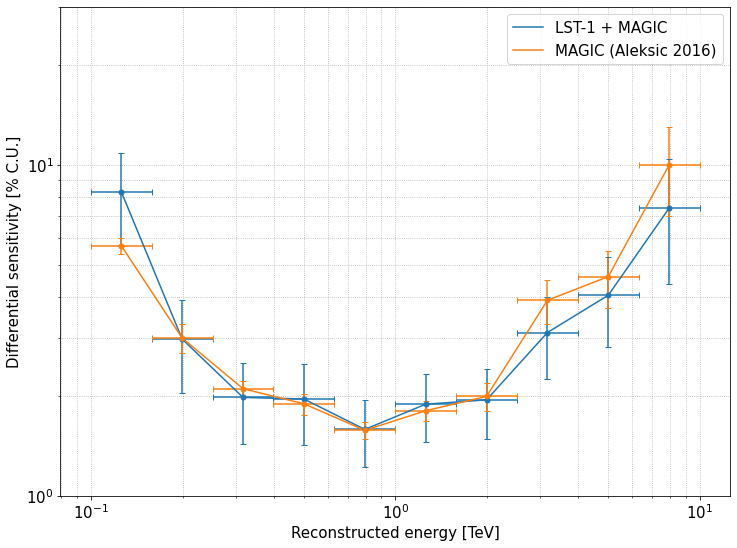

In [11]:
pyplot.figure()
pyplot.xlabel('Reconstructed energy [TeV]')
pyplot.ylabel('Differential sensitivity [% C.U.]')
pyplot.ylim(1, 30)
pyplot.loglog()

bins_center = np.sqrt(bins_eng[:-1] * bins_eng[1:])
x_err = [bins_center - bins_eng[:-1], bins_eng[1:] - bins_center]

pyplot.plot(
    bins_center, sensies_best*100, color=color_cycle[0], label='LST-1 + MAGIC'
)

pyplot.errorbar(
    x=bins_center, xerr=x_err, y=sensies_best*100, yerr=sensies_best_err*100,
    capsize=3, linestyle='None', color=color_cycle[0], marker='o', markersize=5
)

pyplot.plot(
    bins_center, sensies_magic*100, color=color_cycle[1], label='MAGIC (Aleksic 2016)'
)

pyplot.errorbar(
    x=bins_center, xerr=x_err, y=sensies_magic*100, yerr=sensies_magic_err*100,
    capsize=3, linestyle='None', color=color_cycle[1], marker='o', markersize=5
)

pyplot.grid(which='both')
pyplot.legend()

### Sensitivity in SED units

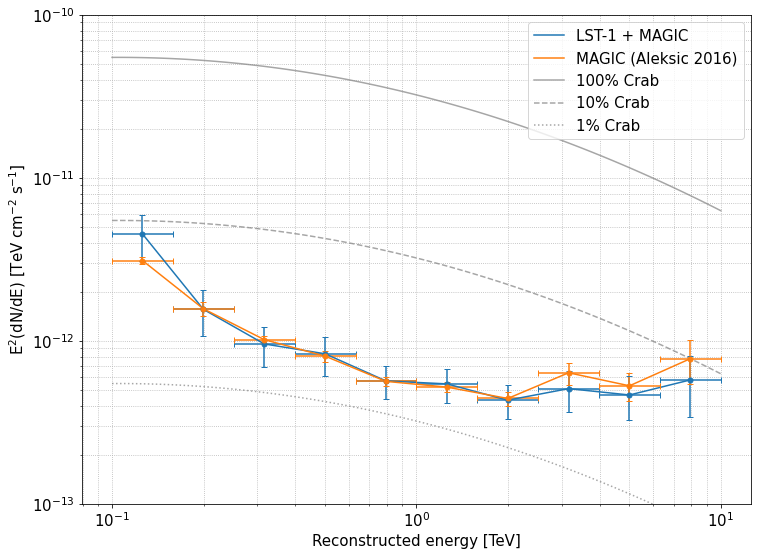

In [12]:
pyplot.figure()
pyplot.xlabel('Reconstructed energy [TeV]')
pyplot.ylabel('E$^2$(dN/dE) [TeV cm$^{-2}$ s$^{-1}$]')
pyplot.ylim(1e-13, 1e-10)
pyplot.loglog()

crab_seds = bins_center**2*(crab_magic(bins_center*u.TeV).value)

pyplot.plot(
    bins_center, sensies_best*crab_seds, color=color_cycle[0], label='LST-1 + MAGIC'
)

pyplot.errorbar(
    x=bins_center, xerr=x_err, y=sensies_best*crab_seds,yerr=sensies_best_err*crab_seds,
    capsize=3, linestyle='None', color=color_cycle[0], marker='o', markersize=5
)

pyplot.plot(
    bins_center, sensies_magic*crab_seds, color=color_cycle[1], label='MAGIC (Aleksic 2016)'
)

pyplot.errorbar(
    x=bins_center, xerr=x_err, y=sensies_magic*crab_seds, yerr=sensies_magic_err*crab_seds,
    capsize=3, linestyle='None', color=color_cycle[1], marker='o', markersize=5
)

bins_eng_crab = np.logspace(-1, 1, 101)

for ratio, style in zip([1, 0.1, 0.01], ['-', '--', ':']):

    pyplot.plot(
        bins_eng_crab, ratio*bins_eng_crab**2*crab_magic(bins_eng_crab*u.TeV).value,
        linestyle=style, color='grey', label=f'{ratio*100:.0f}% Crab', alpha=0.7
    )

pyplot.grid(which='both')
pyplot.legend()